# BERT Fine-tuning on IMDB for Sentiment Analysis

**Course:** AIDI 1002 – Machine Learning  
**Project:** Final Project – Research Paper Reproduction and Extension  
**Paper:** *BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding* (Devlin et al., 2019)  
**Dataset:** IMDB Movie Reviews (Sentiment Analysis)


## 1. Project Selection

For this final project, we selected the research paper **“BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding”** by Devlin et al., published in the Proceedings of NAACL-HLT 2019. This paper introduces BERT, a deep bidirectional Transformer-based language model that significantly advanced the state of the art in multiple Natural Language Processing (NLP) tasks, including sentiment analysis, question answering, and natural language inference.

The selected paper meets all the project requirements: it was published after 2019, is directly related to machine learning and NLP, provides publicly available source code through a GitHub repository, and uses well-established datasets. The availability of pre-trained BERT models and fine-tuning instructions makes the methodology reproducible and suitable for extension, allowing meaningful experimentation and contribution as part of this project.


## 2. Introduction

Natural Language Processing (NLP) has witnessed major advancements due to the adoption of deep learning and transfer learning techniques. Traditional NLP models relied heavily on task-specific architectures and handcrafted features, which limited their generalization across tasks. More recent approaches leverage large-scale pre-training on unlabeled text corpora, followed by fine-tuning on downstream tasks, enabling models to learn rich and transferable language representations.

BERT (Bidirectional Encoder Representations from Transformers) represents a significant breakthrough in this area. Unlike earlier unidirectional language models, BERT is trained using a masked language modeling objective that allows it to capture contextual information from both the left and right sides of a token. Additionally, BERT incorporates a next sentence prediction task during pre-training, which improves its understanding of sentence-level relationships. These design choices allow BERT to be fine-tuned with minimal architectural changes while achieving strong performance across a wide range of NLP tasks.

In this project, we focus on applying the BERT fine-tuning methodology to the task of sentiment analysis using the IMDB movie reviews dataset. The goal is to evaluate BERT’s effectiveness on real-world, long-form user reviews and to analyze its performance in comparison to simpler baseline approaches.


## 3. Problem Statement

Sentiment analysis aims to automatically determine the polarity of a given text, such as whether a movie review expresses a positive or negative opinion. This task is particularly challenging for long, unstructured reviews, where sentiment may depend on contextual cues, negations, and nuanced language patterns. Traditional machine learning models often struggle to capture such complex dependencies, especially when relying on bag-of-words or shallow sequence representations.

The problem addressed in this project is to accurately classify movie reviews from the IMDB dataset into positive or negative sentiment categories. We investigate whether fine-tuning a pre-trained BERT model can effectively capture the contextual semantics of movie reviews and outperform simpler baseline models. Additionally, we aim to analyze how BERT’s bidirectional representations contribute to improved sentiment classification performance on long-form textual data.


## 4. Dataset Description – IMDB Movie Reviews

For our experiments, we use the **Large Movie Review Dataset (IMDB)**, a widely used benchmark for binary sentiment classification. The dataset consists of movie reviews collected from the Internet Movie Database (IMDB) and is labeled as either **positive** or **negative** based on the overall sentiment of the review.

- **Number of training samples:** 25,000 reviews  
- **Number of test samples:** 25,000 reviews  
- **Task type:** Supervised, binary classification (positive vs negative)  
- **Text length:** Reviews are relatively long, often containing multiple sentences and detailed opinions.

The characteristics of this dataset make it suitable for evaluating BERT’s ability to model long-range dependencies and nuanced sentiment in natural language. In this project, we will split the training set into training and validation subsets, use a simple baseline model as a point of comparison, and then fine-tune a pre-trained BERT model on the same data.


In [5]:
# 4.1 Setup and Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import torch
from datasets import load_dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments
)

import seaborn as sns
from tqdm.auto import tqdm

print("PyTorch version:", torch.__version__)
print("Using GPU:", torch.cuda.is_available())



PyTorch version: 2.9.1+cpu
Using GPU: False


In [6]:
# 4.2 Load IMDB dataset

imdb = load_dataset("imdb")

# Inspect the splits
print(imdb)
print("Train samples:", len(imdb["train"]))
print("Test samples:", len(imdb["test"]))

# Convert a small sample to pandas just to peek (optional)
df_train_sample = pd.DataFrame(imdb["train"][:5])
df_train_sample


README.md: 0.00B [00:00, ?B/s]

C:\Apps\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\YASH MEHAR\.cache\huggingface\hub\datasets--imdb. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performan

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})
Train samples: 25000
Test samples: 25000


,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


In [7]:
# 5. Baseline Model: TF-IDF + Logistic Regression

# Extract raw texts and labels from the training and test splits
train_texts = imdb["train"]["text"]
train_labels = imdb["train"]["label"]

test_texts = imdb["test"]["text"]
test_labels = imdb["test"]["label"]

# Create a validation split from the training data
X_train, X_val, y_train, y_val = train_test_split(
    train_texts,
    train_labels,
    test_size=0.2,
    random_state=42,
    stratify=train_labels
)

len(X_train), len(X_val), len(test_texts)


(20000, 5000, 25000)

In [8]:
# 5.1 TF-IDF Vectorization

tfidf = TfidfVectorizer(
    max_features=20000,   # limit vocab size
    ngram_range=(1, 2),   # unigrams + bigrams
    stop_words="english"
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(test_texts)

X_train_tfidf.shape, X_val_tfidf.shape, X_test_tfidf.shape


((20000, 20000), (5000, 20000), (25000, 20000))

In [9]:
# 5.2 Train Logistic Regression baseline

baseline_clf = LogisticRegression(
    max_iter=200,
    n_jobs=-1
)

baseline_clf.fit(X_train_tfidf, y_train)

# Evaluate on validation and test sets
val_preds = baseline_clf.predict(X_val_tfidf)
test_preds = baseline_clf.predict(X_test_tfidf)

val_acc = accuracy_score(y_val, val_preds)
test_acc = accuracy_score(test_labels, test_preds)

print(f"Baseline Validation Accuracy: {val_acc:.4f}")
print(f"Baseline Test Accuracy:       {test_acc:.4f}")


Baseline Validation Accuracy: 0.8922
Baseline Test Accuracy:       0.8790


Classification Report (Baseline – Test Set):
              precision    recall  f1-score   support

    negative       0.88      0.88      0.88     12500
    positive       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



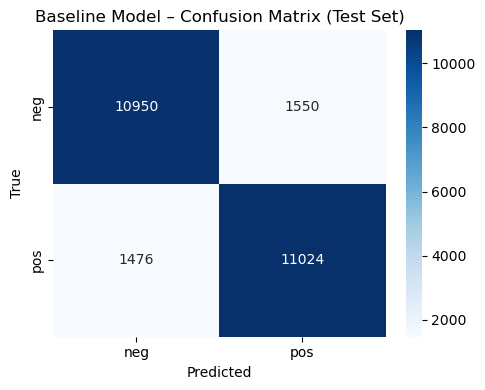

In [10]:
# 5.3 Detailed evaluation for baseline on test set

print("Classification Report (Baseline – Test Set):")
print(classification_report(test_labels, test_preds, target_names=["negative", "positive"]))

cm = confusion_matrix(test_labels, test_preds)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["neg", "pos"], yticklabels=["neg", "pos"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Baseline Model – Confusion Matrix (Test Set)")
plt.tight_layout()
plt.show()


### 5.4 Baseline Performance Summary

The TF-IDF + Logistic Regression baseline achieves an accuracy of **0.88** on the IMDB test set.  
Both sentiment classes (positive and negative) obtain an F1-score of **0.88**, indicating that the model performs symmetrically across classes.

From the confusion matrix:

- True negatives: 10,950  
- False positives: 1,550  
- False negatives: 1,476  
- True positives: 11,024  

Overall, the baseline model provides a strong starting point for sentiment classification using simple bag-of-words style features. This makes it a suitable reference for evaluating the performance gains achieved by fine-tuning a BERT model on the same dataset.


## 6. BERT Fine-tuning on IMDB

In this section, we fine-tune a pre-trained BERT model on the IMDB dataset for binary sentiment classification. Instead of representing reviews as sparse TF-IDF vectors, BERT operates directly on tokenized text and produces contextual embeddings using a deep bidirectional Transformer encoder. A classification head is added on top of the [CLS] token representation to predict whether a review is positive or negative.

We use the `bert-base-uncased` variant from the Hugging Face Transformers library. The model is trained on the same training/validation split as the baseline, allowing a fair comparison between the traditional TF-IDF + Logistic Regression model and the Transformer-based BERT model.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import torch
from datasets import load_dataset, DatasetDict

from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments
)

import seaborn as sns
from tqdm.auto import tqdm

print("PyTorch version:", torch.__version__)
print("Using GPU:", torch.cuda.is_available())


PyTorch version: 2.9.1+cpu
Using GPU: False


In [6]:
from datasets import load_dataset

imdb = load_dataset("imdb")

print(imdb)
print("Train samples:", len(imdb["train"]))
print("Test samples:", len(imdb["test"]))


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})
Train samples: 25000
Test samples: 25000


In [7]:
# 6.1 Create train/validation split from the HF IMDB dataset

imdb_train_valid = imdb["train"].train_test_split(
    test_size=0.2,
    stratify_by_column="label",
    seed=42
)

train_dataset = imdb_train_valid["train"]
val_dataset   = imdb_train_valid["test"]
test_dataset  = imdb["test"]

print(train_dataset)
print(val_dataset)
print(test_dataset)


Dataset({
    features: ['text', 'label'],
    num_rows: 20000
})
Dataset({
    features: ['text', 'label'],
    num_rows: 5000
})
Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})


In [8]:
# 6.1b Extra-small subsets for CPU-friendly BERT training

max_train = 800   # previously 4000
max_val   = 200   # previously 1000
max_test  = 400   # previously 2000

train_dataset_small = train_dataset.shuffle(seed=42).select(range(max_train))
val_dataset_small   = val_dataset.shuffle(seed=42).select(range(max_val))
test_dataset_small  = test_dataset.shuffle(seed=42).select(range(max_test))

print("Small train size:", len(train_dataset_small))
print("Small val size:", len(val_dataset_small))
print("Small test size:", len(test_dataset_small))

# overwrite original variables so later code stays the same
train_dataset = train_dataset_small
val_dataset   = val_dataset_small
test_dataset  = test_dataset_small



Small train size: 800
Small val size: 200
Small test size: 400


In [9]:
# 6.2 Tokenization for BERT (shorter sequences)

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

max_length = 64  # less memory

def tokenize_function(examples):
    return tokenizer(
        examples["text"],
        truncation=True,
        padding="max_length",
        max_length=max_length
    )

tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val   = val_dataset.map(tokenize_function, batched=True)
tokenized_test  = test_dataset.map(tokenize_function, batched=True)

tokenized_train = tokenized_train.remove_columns(["text"])
tokenized_val   = tokenized_val.remove_columns(["text"])
tokenized_test  = tokenized_test.remove_columns(["text"])

tokenized_train.set_format("torch")
tokenized_val.set_format("torch")
tokenized_test.set_format("torch")

tokenized_train[0]


Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

{'label': tensor(0),
 'input_ids': tensor([  101,  1045,  2064,  1005,  1056,  2360,  2023,  2003,  1996,  5409,
          2143,  1997,  2035,  2051,  1010,  2021,  2069,  2138,  2045,  2024,
          2145,  2070,  5691,  1045,  4033,  1005,  1056,  2464,  1010,  2664,
           999,  2023,  2038,  2000,  2022,  1996,  2087,  3653,  6528, 20771,
          3535,  2012,  2437,  1037,  3185,  1997,  2035,  2051,   999,  1996,
          2472, 17567,  2013,  1996,  2168,  3314,  2002,  2018,  2007,  1000,
          2045,  2097,  2022,   102]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1

In [10]:
# 6.3 Load BERT model for sequence classification

model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2
)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

print("Using device:", device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using device: cpu


In [11]:
# 6.4 Metrics used by Trainer

from sklearn.metrics import precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)

    precision, recall, f1, _ = precision_recall_fscore_support(
        labels,
        preds,
        average="binary"
    )

    acc = accuracy_score(labels, preds)

    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }


In [12]:
# 6.5 TrainingArguments + Trainer (slight for CPU)

training_args = TrainingArguments(
    output_dir="results/bert-imdb-small",
    per_device_train_batch_size=4,   # lower batch size
    per_device_eval_batch_size=4,
    num_train_epochs=1,              # only 1 epoch
    learning_rate=2e-5,
    weight_decay=0.01,
    gradient_accumulation_steps=1    # can set to 2 if still needed
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


C:\Users\YASH MEHAR\AppData\Local\Temp\ipykernel_48368\264642630.py:13: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [13]:
# 6.6 Fine-tune BERT

train_result = trainer.train()
train_result


C:\Apps\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss


TrainOutput(global_step=200, training_loss=0.6091250991821289, metrics={'train_runtime': 413.6026, 'train_samples_per_second': 1.934, 'train_steps_per_second': 0.484, 'total_flos': 26311105536000.0, 'train_loss': 0.6091250991821289, 'epoch': 1.0})

In [14]:
# 6.7 Evaluate on validation set
val_metrics = trainer.evaluate(eval_dataset=tokenized_val)
print("Validation metrics:")
for k, v in val_metrics.items():
    print(f"{k}: {v:.4f}")


C:\Apps\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Validation metrics:
eval_loss: 0.5078
eval_accuracy: 0.7600
eval_precision: 0.7570
eval_recall: 0.7864
eval_f1: 0.7714
eval_runtime: 24.0273
eval_samples_per_second: 8.3240
eval_steps_per_second: 2.0810
epoch: 1.0000


In [15]:
# 6.8 Evaluate on test set
test_metrics = trainer.evaluate(eval_dataset=tokenized_test)
print("Test metrics:")
for k, v in test_metrics.items():
    print(f"{k}: {v:.4f}")



C:\Apps\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Test metrics:
eval_loss: 0.4548
eval_accuracy: 0.8150
eval_precision: 0.8250
eval_recall: 0.8088
eval_f1: 0.8168
eval_runtime: 46.9612
eval_samples_per_second: 8.5180
eval_steps_per_second: 2.1290
epoch: 1.0000


C:\Apps\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Classification Report (BERT – Test Subset):
              precision    recall  f1-score   support

    negative       0.81      0.82      0.81       196
    positive       0.82      0.81      0.82       204

    accuracy                           0.81       400
   macro avg       0.81      0.82      0.81       400
weighted avg       0.82      0.81      0.82       400



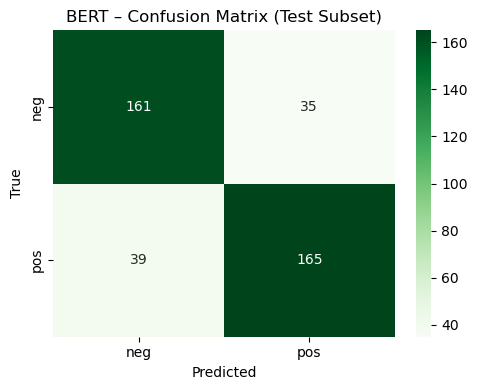

In [17]:
# 6.9 Detailed evaluation on test set

pred_output = trainer.predict(tokenized_test)
bert_logits = pred_output.predictions
bert_preds = bert_logits.argmax(axis=-1)

print("Classification Report (BERT – Test Subset):")
print(classification_report(
    test_dataset["label"],
    bert_preds,
    target_names=["negative", "positive"]
))

cm_bert = confusion_matrix(test_dataset["label"], bert_preds)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_bert, annot=True, fmt="d", cmap="Greens",
            xticklabels=["neg", "pos"], yticklabels=["neg", "pos"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("BERT – Confusion Matrix (Test Subset)")
plt.tight_layout()
plt.savefig("results/bert_confusion_matrix_small.png")
plt.show()
